### 1. PParser 

In [1]:
from p2m.parser import PParser

parser = PParser()
image = parser.load_image("resources/samples/fire.jpg")
stafflines = parser.find_staff_lines(min_contour_area=100000)

print(len(stafflines))
print 

9


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

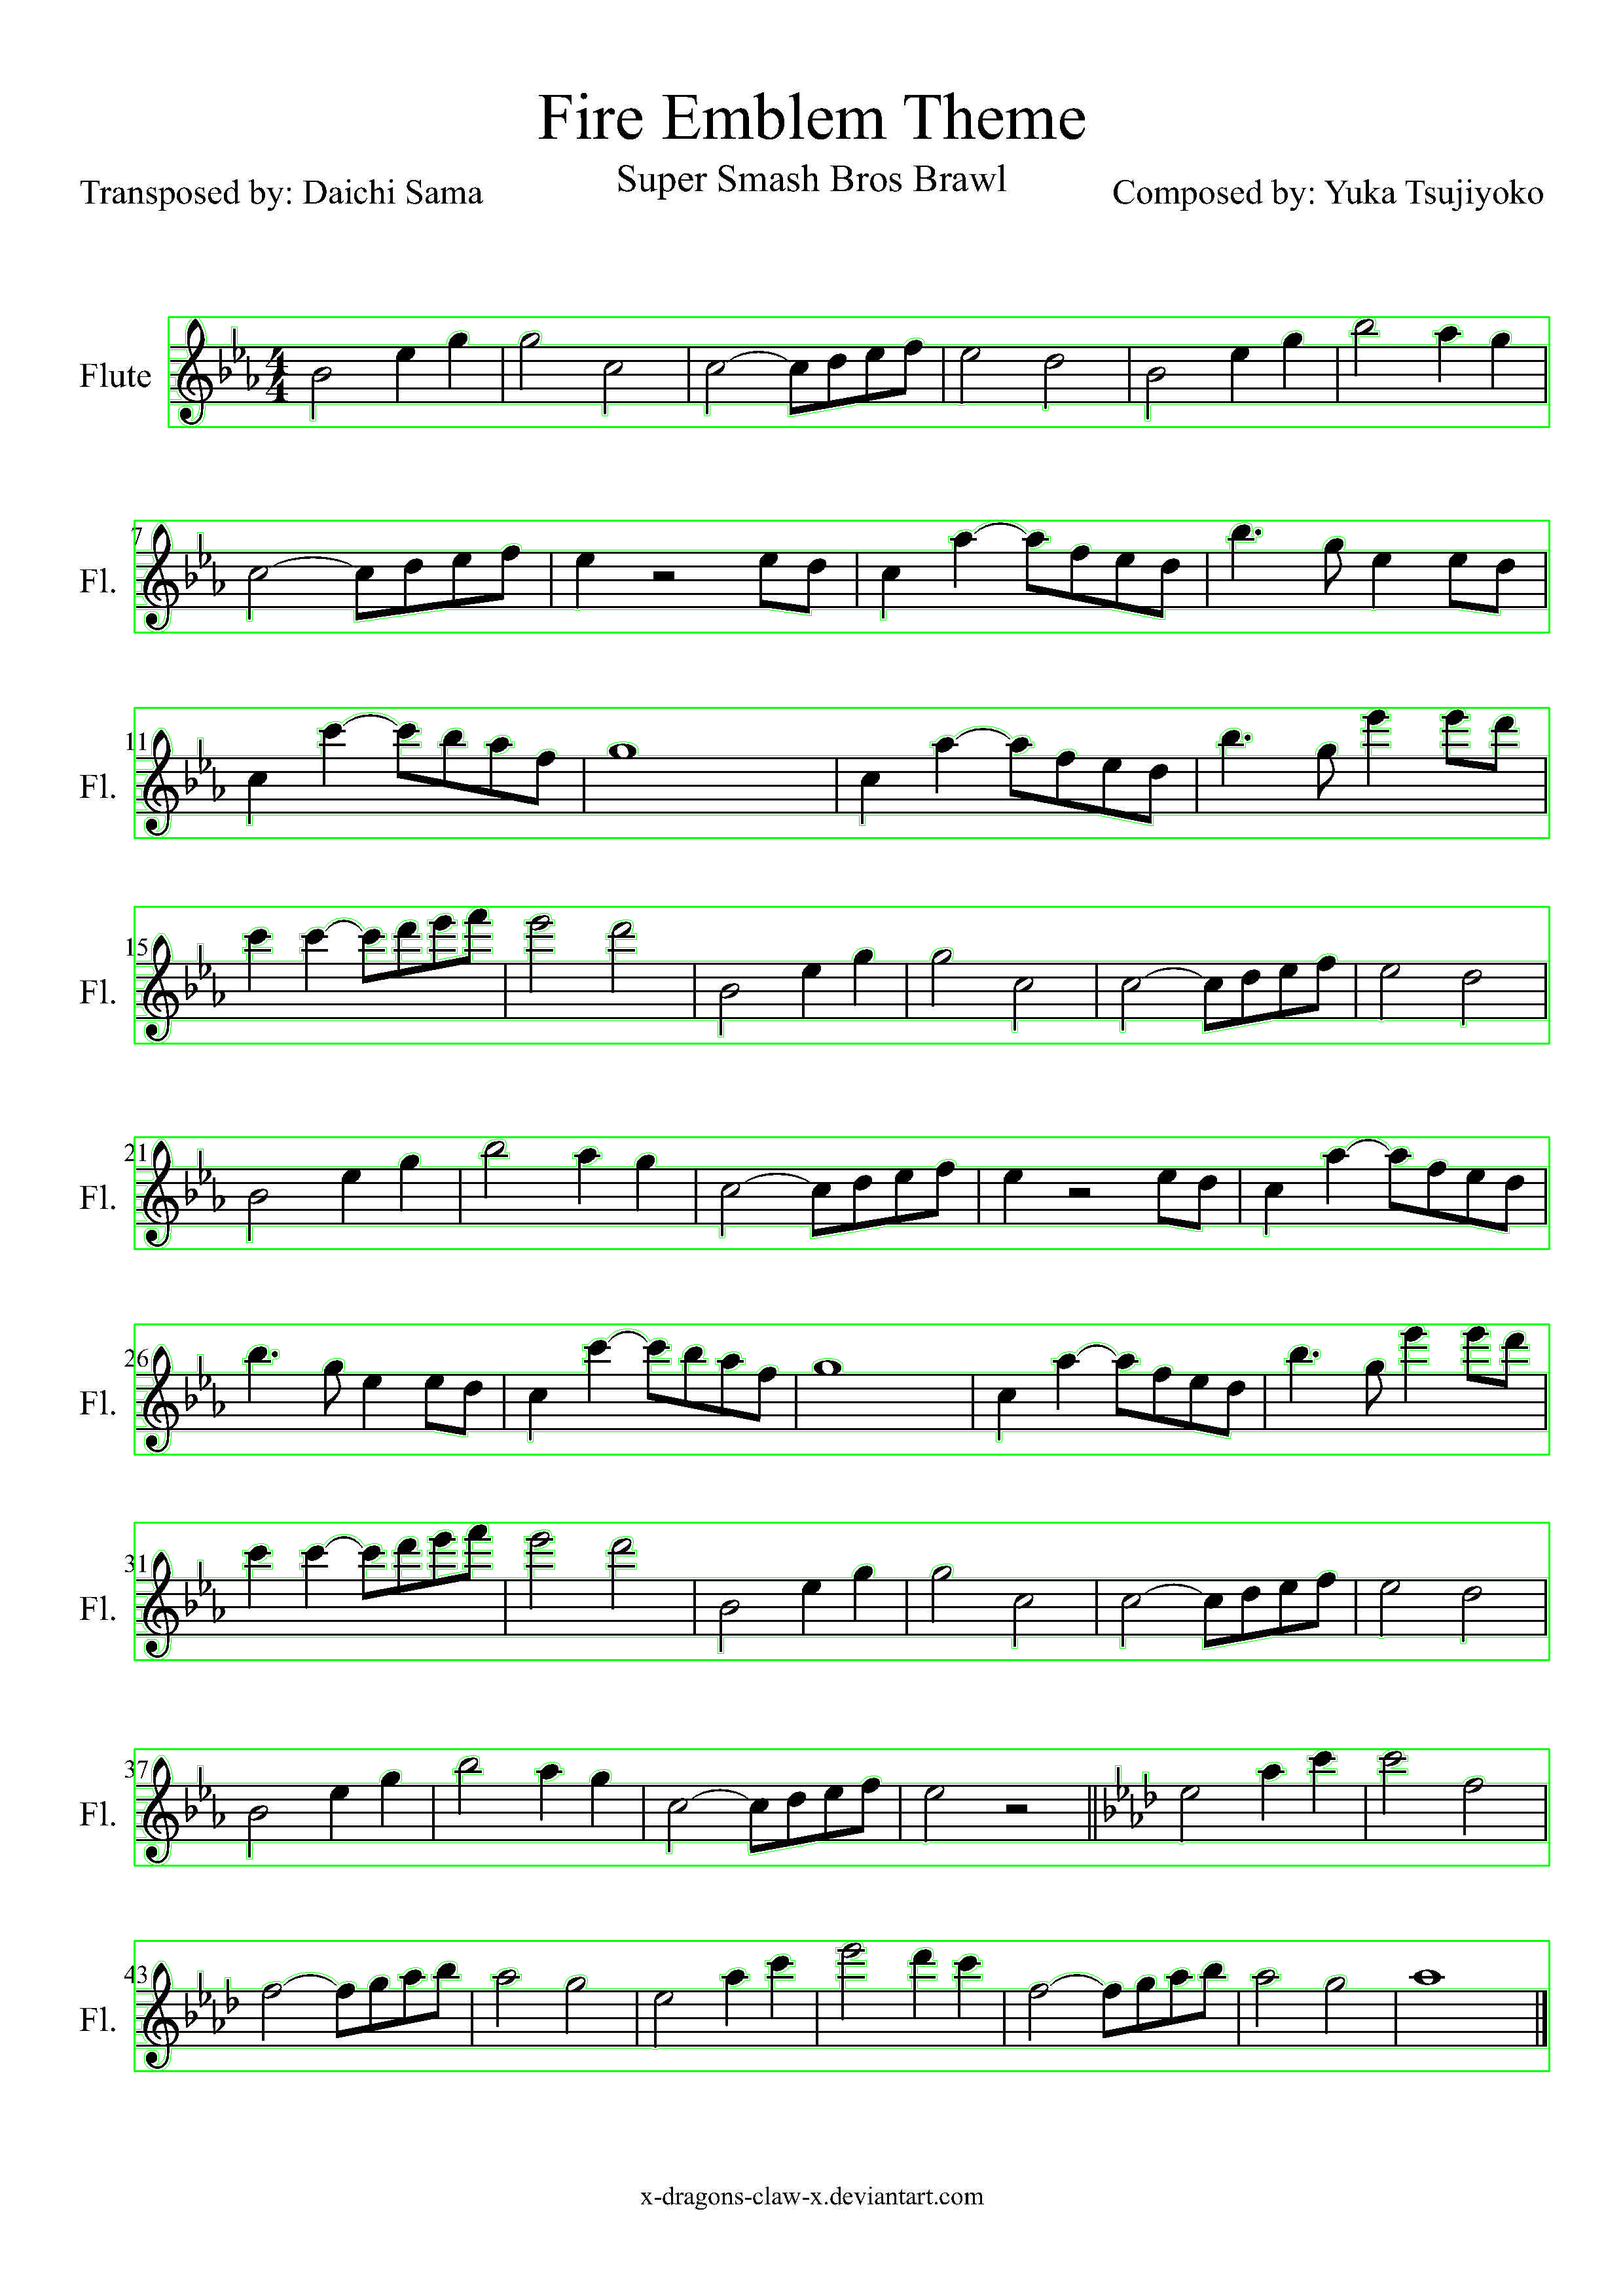

In [2]:
from PIL import Image
visualization = parser.draw_staff_lines(image, stafflines)
Image.fromarray(visualization)

### 2.YOLO-Parser

In [3]:
from ultralytics import YOLO
import cv2

model = YOLO('models/yparser.pt')

staffs = [cv2.cvtColor(staffline.image, cv2.COLOR_RGB2BGR) for staffline in stafflines]

detections = []
for staff in staffs:
    results = model.predict(
        source=staff, 
        save = False,
        project='resources/output/YOLO/tests',
    )
    results[0].show()
    detections.append(results)


0: 64x640 1 clef, 1 gamme, 1 metrics, 18 notes, 211.2ms
Speed: 1.4ms preprocess, 211.2ms inference, 1.3ms postprocess per image at shape (1, 3, 64, 640)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.



0: 64x640 1 clef, 1 gamme, 19 notes, 1 pause, 155.5ms
Speed: 1.9ms preprocess, 155.5ms inference, 0.6ms postprocess per image at shape (1, 3, 64, 640)

0: 64x640 1 clef, 1 gamme, 18 notes, 145.0ms
Speed: 1.3ms preprocess, 145.0ms inference, 0.6ms postprocess per image at shape (1, 3, 64, 640)

0: 64x640 1 clef, 1 gamme, 20 notes, 152.5ms
Speed: 1.2ms preprocess, 152.5ms inference, 0.5ms postprocess per image at shape (1, 3, 64, 640)

0: 64x640 1 clef, 1 gamme, 20 notes, 1 pause, 156.8ms
Speed: 1.0ms preprocess, 156.8ms inference, 0.6ms postprocess per image at shape (1, 3, 64, 640)

0: 64x640 1 clef, 1 gamme, 23 notes, 152.1ms
Speed: 1.5ms preprocess, 152.1ms inference, 0.5ms postprocess per image at shape (1, 3, 64, 640)

0: 64x640 1 clef, 1 gamme, 20 notes, 151.5ms
Speed: 1.1ms preprocess, 151.5ms inference, 0.9ms postprocess per image at shape (1, 3, 64, 640)

0: 64x640 1 clef, 2 gammes, 18 notes, 1 pause, 158.3ms
Speed: 1.3ms preprocess, 158.3ms inference, 0.5ms postprocess per im

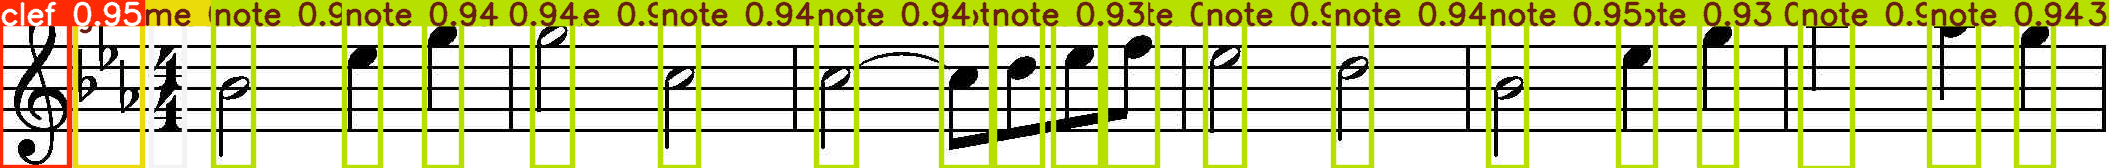

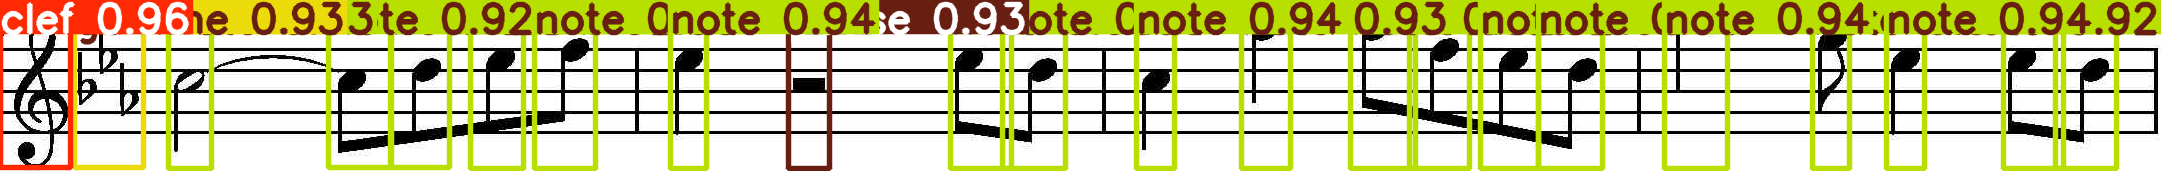

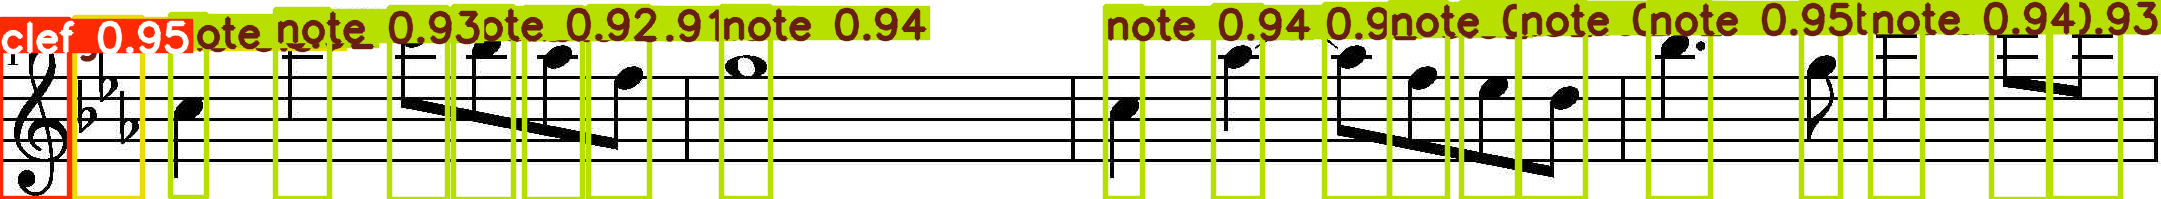

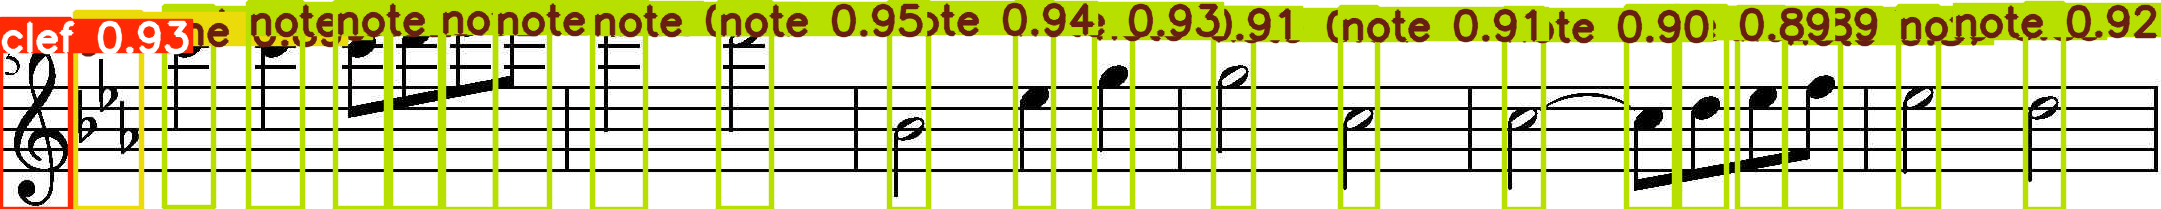

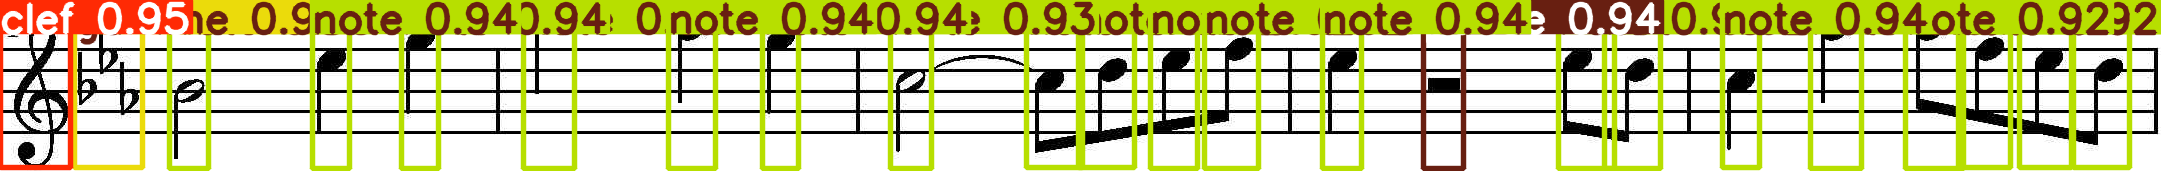

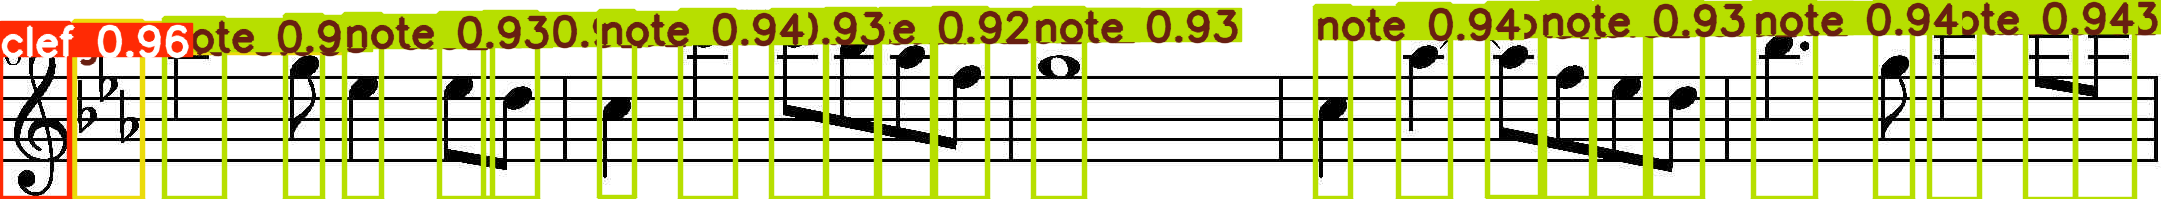

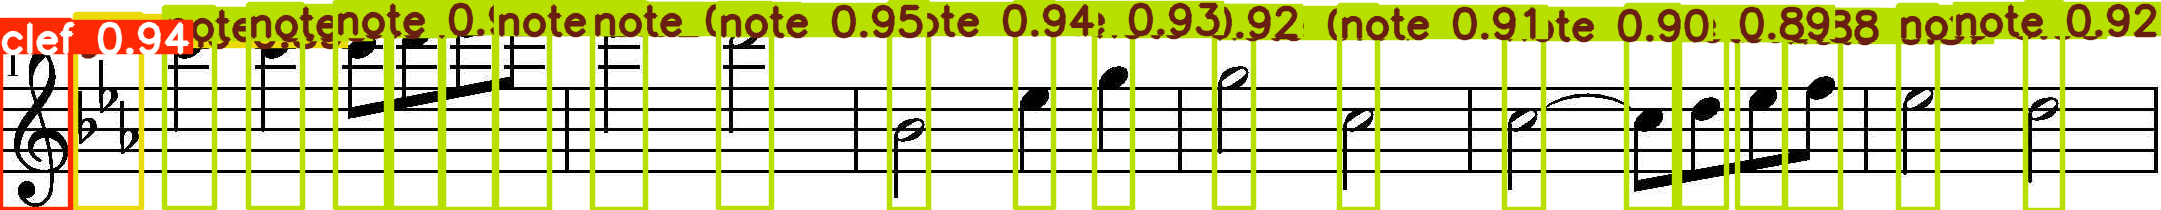

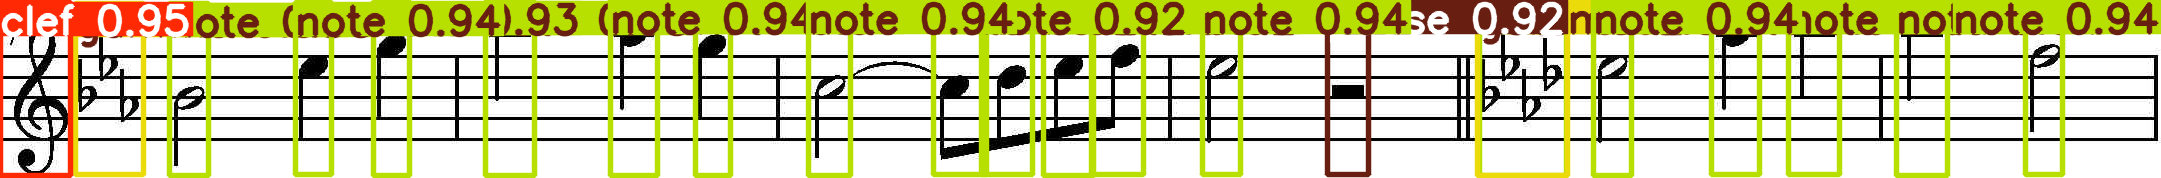

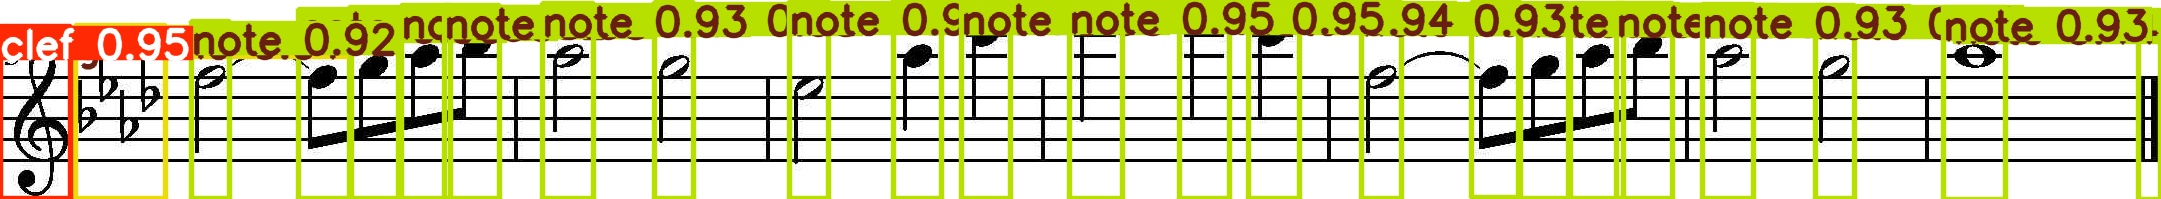

In [4]:
from PIL import Image

for i, result in enumerate(detections):
    display(Image.fromarray(result[0].plot()))

